# Feature Plots

### Imports

In [7]:
import scanpy.api as sc

In [8]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
repo_path = '/Users/mincheolkim/Github/'
data_path = '/Users/mincheolkim/Documents/'

In [10]:
import sys
sys.path.append(repo_path + 'scVI')
sys.path.append(repo_path + 'scVI-extensions')

In [11]:
import os

import numpy as np
from sklearn.manifold import TSNE
from anndata import AnnData
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import torch
import scipy.sparse as sp_sparse
import imp
from scipy.stats import ttest_ind, wasserstein_distance, ks_2samp
import umap
from scipy.stats import norm
from sklearn.manifold import TSNE
import h5py

from scvi.metrics.clustering import entropy_batch_mixing, get_latent
from scvi.models import VAE, SVAEC, VAEC
from scvi.inference import VariationalInference

In [12]:
import scvi_extensions.dataset.supervised_data_loader as sdl
import scvi_extensions.dataset.cropseq as cs
import scvi_extensions.inference.supervised_variational_inference as svi
import scvi_extensions.hypothesis_testing.mean as mn
import scvi_extensions.hypothesis_testing.variance as vr
import scvi_extensions.dataset.label_data_loader as ldl

### Read the AnnData with tSNE coordinates

In [13]:
embedded_adata = sc.read('/Users/mincheolkim/Documents/nsnp20.raw.sng.km_vb1_default.pc60.norm.h5ad')

In [14]:
embedded_adata

AnnData object with n_obs × n_vars = 289366 × 936 
    obs: 'guide_cov', 'donor_cov', 'well_cov', 'numi_cov', 'multiplet_cov', 'nsnp_cov', 'percent_mito', 'n_counts', 'louvain'
    var: 'gene_ids'
    uns: 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

### Visualize the wells

In [15]:
%matplotlib inline

saving figure to file ./figures/tsne_wells.png


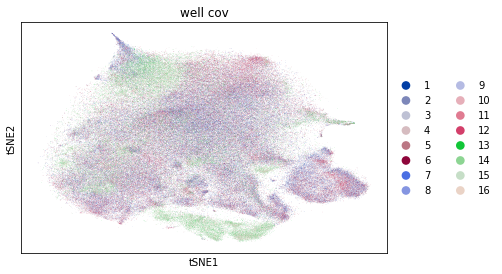

In [16]:
sc.pl.tsne(embedded_adata, color='well_cov', save='_wells.png')

### Visualize the louvain clusters

saving figure to file ./figures/tsne_louvain.png


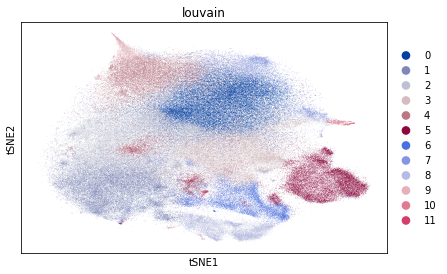

In [17]:
sc.pl.tsne(embedded_adata, color='louvain', save='_louvain.png')

### Annotate with indicator of some marker genes

In [18]:
genes_of_interest = ['IL2RA', 'IL27RA', 'CCR2', 'IL32', 'IL23A','SELL', 'GNLY', 'GZMB', 'IL4R', 'CCR7', 'NKG7', 'TNFRSF18']
for gene in genes_of_interest:
    embedded_adata.obs[gene + '_indicator'] = embedded_adata.X[:, np.where(embedded_adata.var.index == gene)[0][0]] > 0

### Indicator gene plots

saving figure to file ./figures/tsne_feature_IL2RA_indicator.png


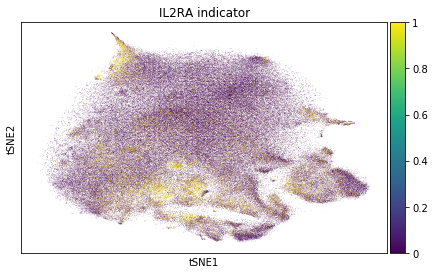

saving figure to file ./figures/tsne_feature_IL27RA_indicator.png


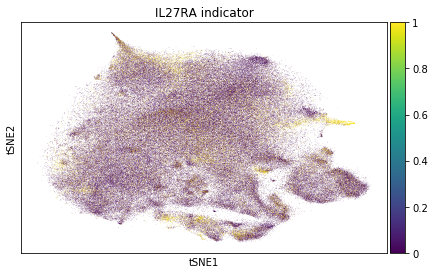

saving figure to file ./figures/tsne_feature_CCR2_indicator.png


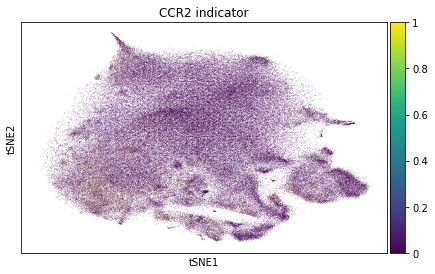

saving figure to file ./figures/tsne_feature_IL32_indicator.png


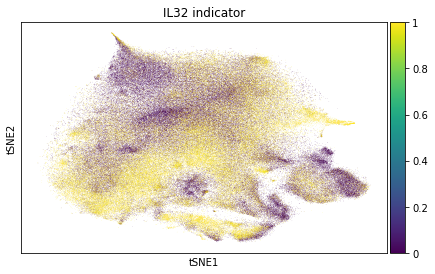

saving figure to file ./figures/tsne_feature_IL23A_indicator.png


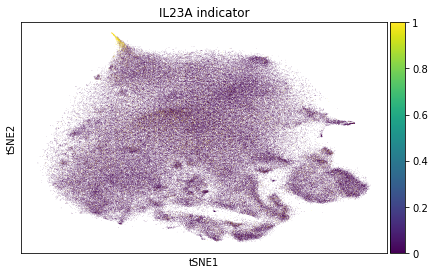

saving figure to file ./figures/tsne_feature_SELL_indicator.png


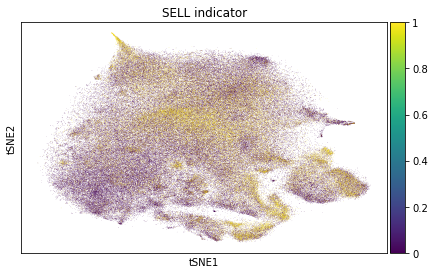

saving figure to file ./figures/tsne_feature_GNLY_indicator.png


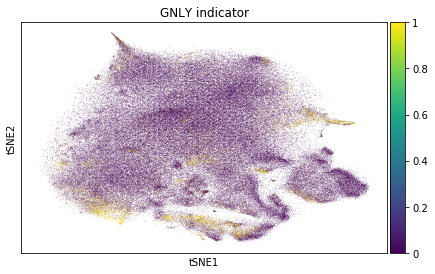

saving figure to file ./figures/tsne_feature_GZMB_indicator.png


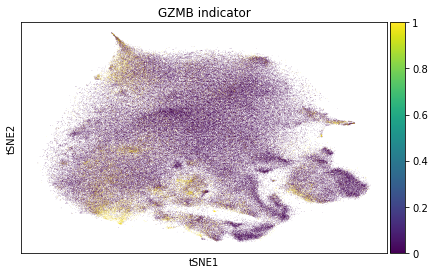

saving figure to file ./figures/tsne_feature_IL4R_indicator.png


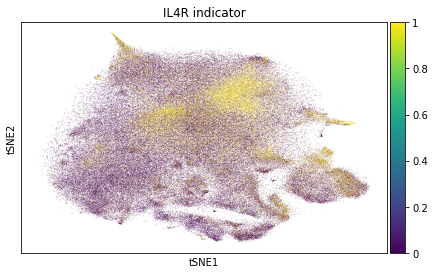

saving figure to file ./figures/tsne_feature_CCR7_indicator.png


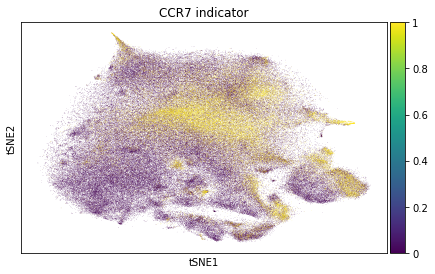

saving figure to file ./figures/tsne_feature_NKG7_indicator.png


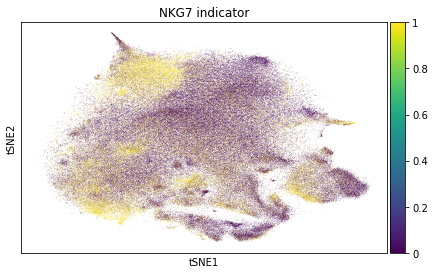

saving figure to file ./figures/tsne_feature_TNFRSF18_indicator.png


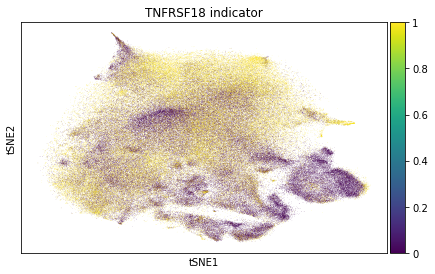

In [19]:
for gene in genes_of_interest:
    sc.pl.tsne(
        embedded_adata, 
        save='_feature_{}_indicator.png'.format(gene),
        color=gene + '_indicator')